# Sampling from Gaussian Distribution

The general form of a Gaussian Distribution $\mathcal{N}(\mu,\sigma)$ involves:
* $\mu$ : mean
* $\sigma$ : standard deviation

To sample from $\mathcal{N}(\mu,\sigma)$, we use the **reparameterization** trick:

$x \sim \mathcal{N}(\mu, \sigma) \rightarrow x = \mu + \epsilon \cdot \sigma, \quad \epsilon \sim \mathcal{N}(0, 1)$



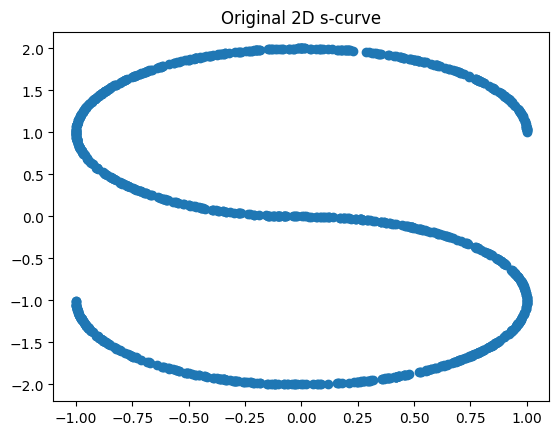

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve

num_samples = 1000
data, t = make_s_curve(num_samples)
# Original data is in 3D of size (1000, 3)
data = data[:, [0,2]] # Visualise 2D only

plt.title("Original 2D s-curve")
plt.scatter(data[:,0], data[:,1])

In [19]:
# Forward process in diffusion model
# q(X_{t} | X_{t-1})
# data: 2D data
# T: The number of timesteps
# betas: List of progressive noise from timestep 0..T-1
def forward(data, T, betas):
    for t in range(T):
        beta_t = betas[t]
        mu = data * np.sqrt(1.0 - beta_t)
        std = np.sqrt(beta_t)
        # reparameterization trick to generate 
        # data ~ N(mu, std)
        data = mu + np.random.randn(data.shape[0], data.shape[1]) * std
    return data

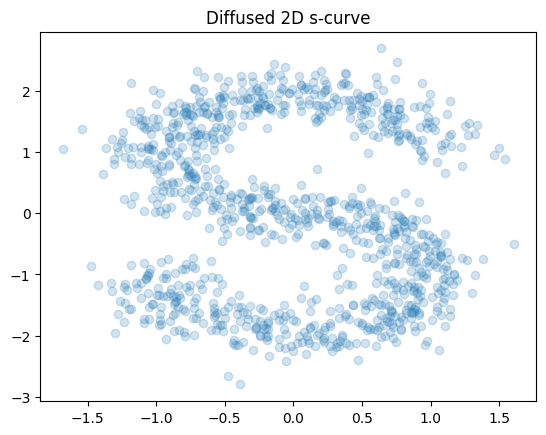

In [20]:
T = 100
betas = np.linspace(1e-5, 1e-3, T)
diffused_data = forward(data, T, betas)

plt.title("Diffused 2D s-curve")
plt.scatter(diffused_data[:,0], diffused_data[:,1], alpha=0.2)